In [144]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [145]:
df = pd.read_csv('04-data/preprocessed_app_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40475 entries, 0 to 40474
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     40475 non-null  object 
 1   description               40475 non-null  object 
 2   summary                   40463 non-null  object 
 3   installs                  40475 non-null  object 
 4   minInstalls               40475 non-null  float64
 5   score                     40475 non-null  float64
 6   ratings                   40475 non-null  float64
 7   reviews                   40475 non-null  float64
 8   histogram                 40475 non-null  object 
 9   price                     40475 non-null  float64
 10  free                      40475 non-null  int64  
 11  currency                  40475 non-null  object 
 12  sale                      40475 non-null  bool   
 13  offersIAP                 40475 non-null  bool   
 14  inAppP

In [146]:
df1 = df[['title','minInstalls','reviews','ratings','free','containsAds','genre','editorsChoice','contentRating',
          'year','top_developer','has_video','installs_day','updated_days','score']]

In [147]:
df1.head()

,title,minInstalls,reviews,ratings,free,containsAds,genre,editorsChoice,contentRating,year,top_developer,has_video,installs_day,updated_days,score
0,World War 2: Offline Strategy,1000000.0,5581.0,19080.0,1,1,Strategy,0,Everyone 10+,2018,0,1,1042.752868,30,4.147644
1,AndroXLS editor for XLS sheets,5000000.0,3770.0,9215.0,1,1,Productivity,0,Everyone,2016,0,1,3255.208333,13,2.973147
2,SoundSeeder -Play music simultaneously and in ...,1000000.0,2490.0,7347.0,1,1,Music & Audio,0,Everyone,2013,0,1,353.857042,240,3.747968
3,LibreOffice & OpenOffice document reader | ODF,5000000.0,8381.0,32406.0,1,1,Productivity,0,Everyone,2010,0,0,1314.751512,14,3.882280
4,"All PDF - PDF Reader, PDF Viewer & PDF Converter",1000000.0,4418.0,10073.0,1,1,Books & Reference,0,Everyone,2018,0,1,905.797101,4,4.376968


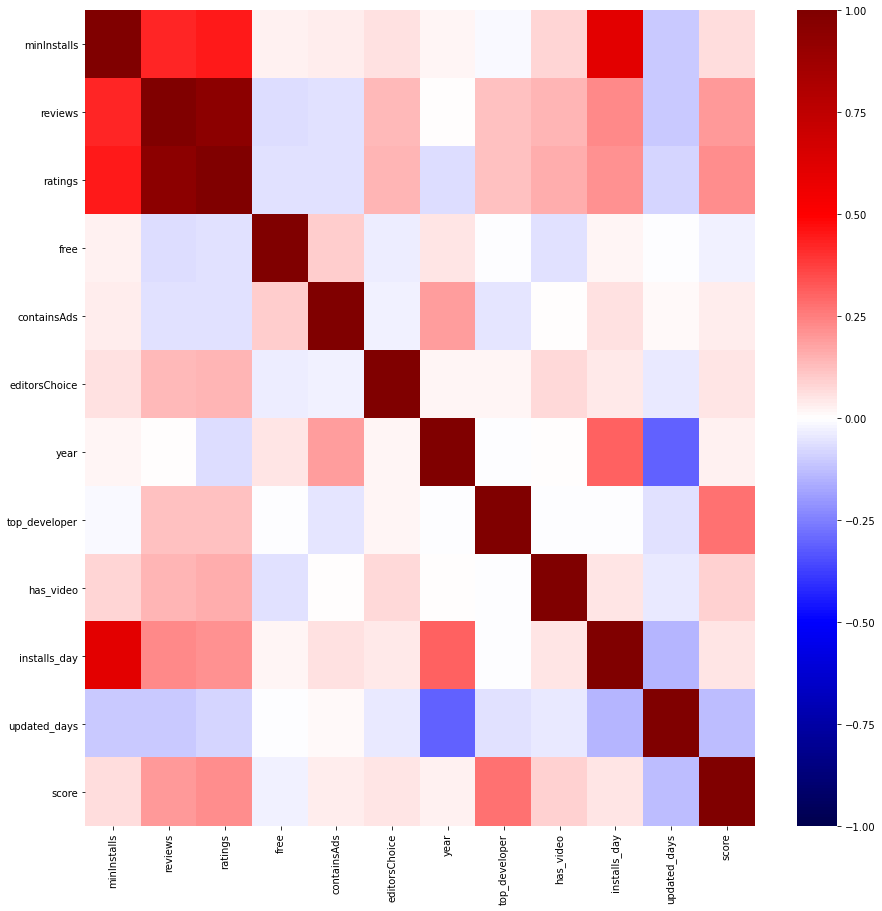

In [148]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

#### Observations

Fairly strong correlation between minInstalls and number of ratings. Consider dropping mininstalls given it is bucketed

<ipython-input-149-2159c77aeb6c>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);


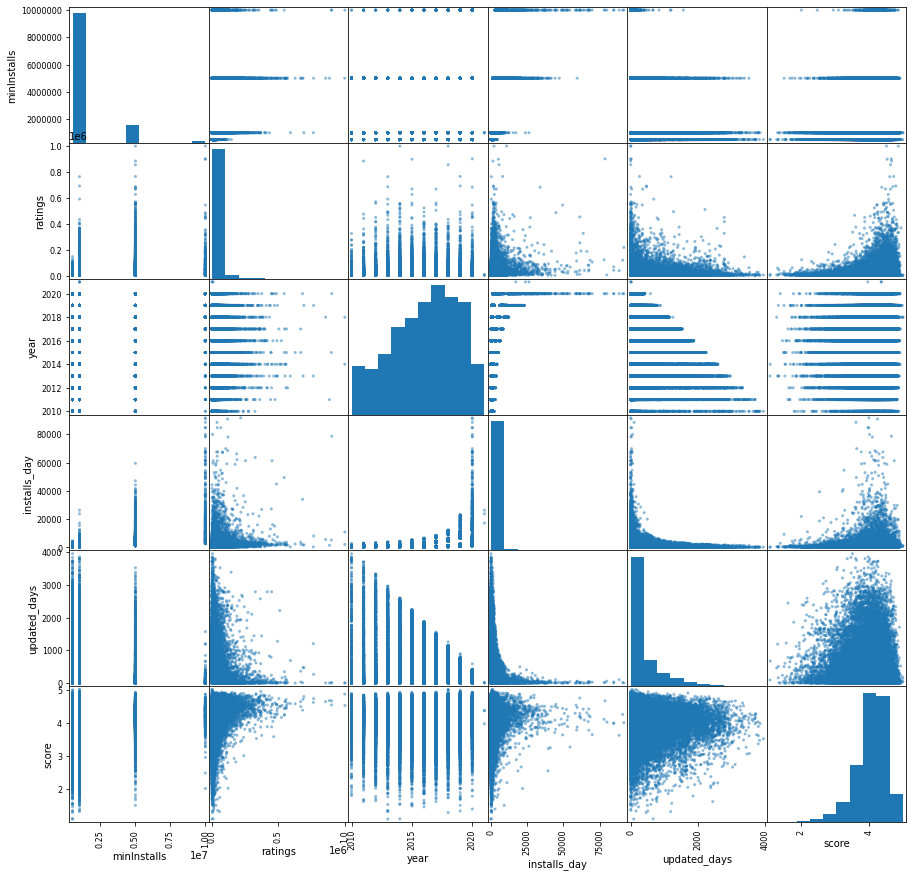

In [149]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','installs_day','updated_days','score']], ax=ax);

#### Observations

Score (target) has a left skew - visualise further

Almost exponential shape for ratings?

In [150]:
print('Average app score overall: {:.3f}'.format(df1['score'].mean()))
print('Median app score overall: {:.3f}'.format(df1['score'].median()))

Average app score overall: 4.064
Median app score overall: 4.135


/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


- Total number of ratings: 40475
- Mean of distribution of rating : 4.064087265403312
- Standard deviation: 0.45789125400674796


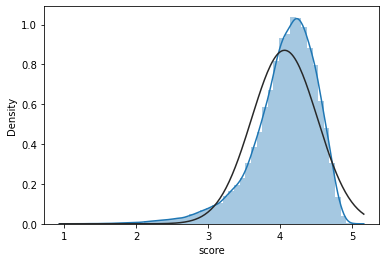

In [151]:
sns.distplot(df1['score'],fit=stats.norm)
print('- Total number of ratings:', len(df1['score']))
print('- Mean of distribution of rating :', np.mean(df1['score']))
print('- Standard deviation:', np.std(df1['score']))

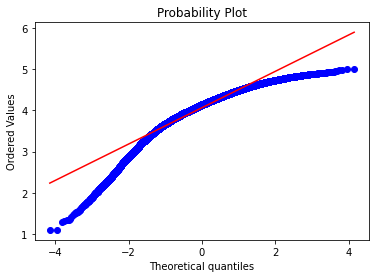

In [152]:
fig = plt.figure() 
prob = stats.probplot(df['score'], plot=plt)

/Users/tawneykirkland/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


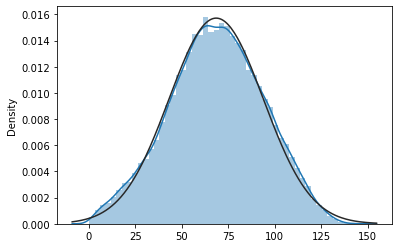

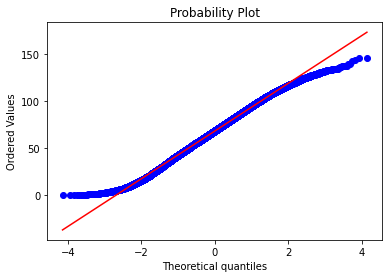

In [153]:
from scipy.stats import boxcox
bcx_target, lam =boxcox(df1['score'])
sns.distplot(bcx_target,fit=stats.norm);
fig = plt.figure()
prob = stats.probplot(bcx_target, plot=plt)

### By number installs

In [154]:
df1.groupby('minInstalls')['score'].mean()

minInstalls
500000.0      4.028998
1000000.0     4.068680
5000000.0     4.128976
10000000.0    4.195070
Name: score, dtype: float64

In [155]:
df1.groupby('minInstalls')['minInstalls'].count()

minInstalls
500000.0      13143
1000000.0     22161
5000000.0      4810
10000000.0      361
Name: minInstalls, dtype: int64

### By content rating

In [156]:
df1.groupby('contentRating')['contentRating'].count()

contentRating
Everyone        30880
Everyone 10+     1853
Mature 17+       1573
Teen             6169
Name: contentRating, dtype: int64

In [157]:
df1.groupby('contentRating')['score'].mean()

contentRating
Everyone        4.068764
Everyone 10+    4.089433
Mature 17+      4.005370
Teen            4.048038
Name: score, dtype: float64

### By app genre

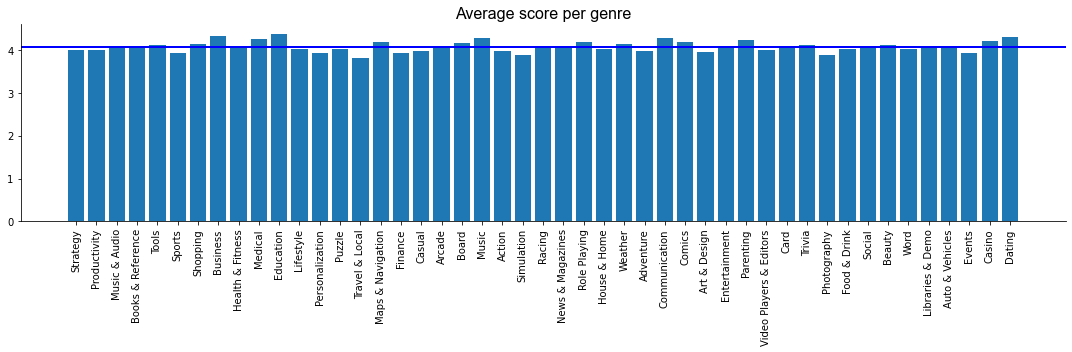

In [158]:
app_genre_score = df.groupby('genre')['score'].mean()
genre_list = df1['genre'].unique()
mean_score = df1['score'].mean()

plt.figure(figsize=[15,5])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(mean_score, label= 'Mean score', color = 'blue', linewidth=2)
plt.bar(genre_list,app_genre_score)   
plt.xticks(genre_list,rotation=90)
plt.title('Average score per genre',family='arial',fontsize=16)
plt.tight_layout()

plt.show;

Does not appear to be significant differences in mean user score across genres

In [159]:
df1.groupby('genre')['genre'].count()

genre
Action                     1858
Adventure                   993
Arcade                     1288
Art & Design                268
Auto & Vehicles             169
Beauty                      108
Board                       428
Books & Reference           777
Business                    457
Card                        407
Casino                      286
Casual                     2105
Comics                      116
Communication               759
Dating                      132
Education                  2358
Entertainment              2317
Events                       19
Finance                     818
Food & Drink                218
Health & Fitness            755
House & Home                 91
Libraries & Demo             46
Lifestyle                  1092
Maps & Navigation           385
Medical                     165
Music                       157
Music & Audio              1282
News & Magazines            326
Parenting                    81
Personalization            2265
Ph

### By whether the app contains ads

In [160]:
df1.groupby('containsAds')['score'].mean()

containsAds
0    4.029583
1    4.072701
Name: score, dtype: float64

Does not appear to be a large difference in apps that do / don't contain ads

### By whether the app is an Editor's Choice

In [161]:
df1.groupby('editorsChoice')['editorsChoice'].count()

editorsChoice
0    40199
1      276
Name: editorsChoice, dtype: int64

In [162]:
df1.groupby('editorsChoice')['score'].mean()

editorsChoice
0    4.062252
1    4.331421
Name: score, dtype: float64

Apps marked as 'Editor's Choice' appear to have higher average score. Makes sense given likely to promote higher quality apps

### By whether the app is free

In [163]:
df1.groupby('free')['free'].count()

free
0      190
1    40285
Name: free, dtype: int64

In [164]:
df1.groupby('free')['score'].mean()

free
0    4.235683
1    4.063278
Name: score, dtype: float64

Paid-for apps appear to have a higher average score. This makes sense given you expect highr quality when you are paying for access

### By top developer in terms of average app score

In [165]:
df1.groupby('top_developer')['score'].mean()

top_developer
0    4.040731
1    4.742033
Name: score, dtype: float64

### By whether the app posting has a video

In [166]:
df1.groupby('has_video')['has_video'].count()

has_video
0    27329
1    13146
Name: has_video, dtype: int64

In [167]:
df1.groupby('has_video')['score'].mean()

has_video
0    4.034988
1    4.124582
Name: score, dtype: float64

In [168]:
df1['ratings'].describe()

count    4.047500e+04
mean     2.308363e+04
std      4.313072e+04
min      1.000000e+03
25%      4.031000e+03
50%      9.143000e+03
75%      2.373250e+04
max      1.000177e+06
Name: ratings, dtype: float64

In [169]:
df1['reviews'].describe()

count     40475.000000
mean       8558.460531
std       16742.620380
min         103.000000
25%        1443.000000
50%        3374.000000
75%        8600.500000
max      466189.000000
Name: reviews, dtype: float64